Author:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tolga Bastürk <br>
Last Change: &nbsp;&nbsp;27.05.2021

# Showcase of selected Numenta Anomaly Benchmark (NAB) Time Series

This jupyter notebook is used for visualizing the NAB datasets which have been selected for evaluating the performance of anomaly detection algorithms.

## Import Packages and define Function Prototypes

In [17]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
"""
load anomaly ground truth labels (required for all following anomalous datasets)

following labels have been modified:
 - AWA: art_daily_jumpsdown.csv        --> [2988:3096] added anomaly ground truth labels for consistancy
 - AWA: art_daily_jumpsup.csv          --> [2988:3096] added anomaly ground truth labels for consistancy
 - AWA: art_daily_nojump.csv           --> [2988:3096] added anomaly ground truth labels for consistancy
 - AWA: art_increase_spike_density.csv --> [2005:2006] added anomaly ground truth labels for consistancy
"""
labelPath = 'NAB\\labels\\combined_labels_modified.json'  # modified labels
#labelPath = 'NAB-master\\labels\\combined_labels.json'          # original labels
with open(labelPath) as json_file:
    groundTruth_JSON = json.load(json_file)

In [21]:
def plotTimeSeries(selectedDatasets, filePath, datasetName):
    """    
        load datasets and create pandas dataframes
    """
    dataFiles = []
    for i in range(len(selectedDatasets)):
        dataFiles.append(selectedDatasets[i])

    datasets = []
    fileNames = []
    counter = 0
    for file in dataFiles:
        if 'csv' in file:
            counter +=1
            raw_data = pd.read_csv(os.path.join(filePath,file))
            df = raw_data
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df = df.sort_values('timestamp')
            datasets.append(df)
            fileNames.append(file)

    """    
        transfer ground truth labels from separate JSON file into pandas dataframe
    """

    for i in range(counter):
        datasets[i]['is_anomaly'] = 0
        keyVal = datasetName + '/' + selectedDatasets[i]
        a_gt = groundTruth_JSON[keyVal]

        for k in range(len(a_gt)):
            strTimestamp = "\'" + a_gt[k] + "\'"
            datasets[i].loc[(datasets[i].timestamp == strTimestamp), 'is_anomaly'] = 1

    """    
        plot choosen datasets with anomaly ground truth
    """
    fig, ax = plt.subplots(nrows = counter,figsize=(20,4*counter))
    fig.subplots_adjust(hspace = 0.5)

    for i in range(counter):

        #ax[i].plot(datasets[i]['timestamp'], datasets[i]['value'],label ='time series data')
        ax[i].plot(datasets[i].index.values, datasets[i]['value'],label ='time series data')    
        ax[i].set(xlabel="index (timestamp)", ylabel="value", title='dataset name: "'+ str(fileNames[i])+'"')

        x = []
        y = []
        for j in range(len(datasets[i])):
            if datasets[i]['is_anomaly'][j] == 1:
                #x.append(datasets[i]['timestamp'][j])
                x.append(datasets[i].index.values[j])
                y.append(datasets[i]['value'][j])
        ax[i].scatter(x,y,color='red', marker = "o", s=50, label='anomaly ground truth')

        ax[i].grid()
        ax[i].legend()

# Selected ArtificialWithAnomaly (AWA) Time Series

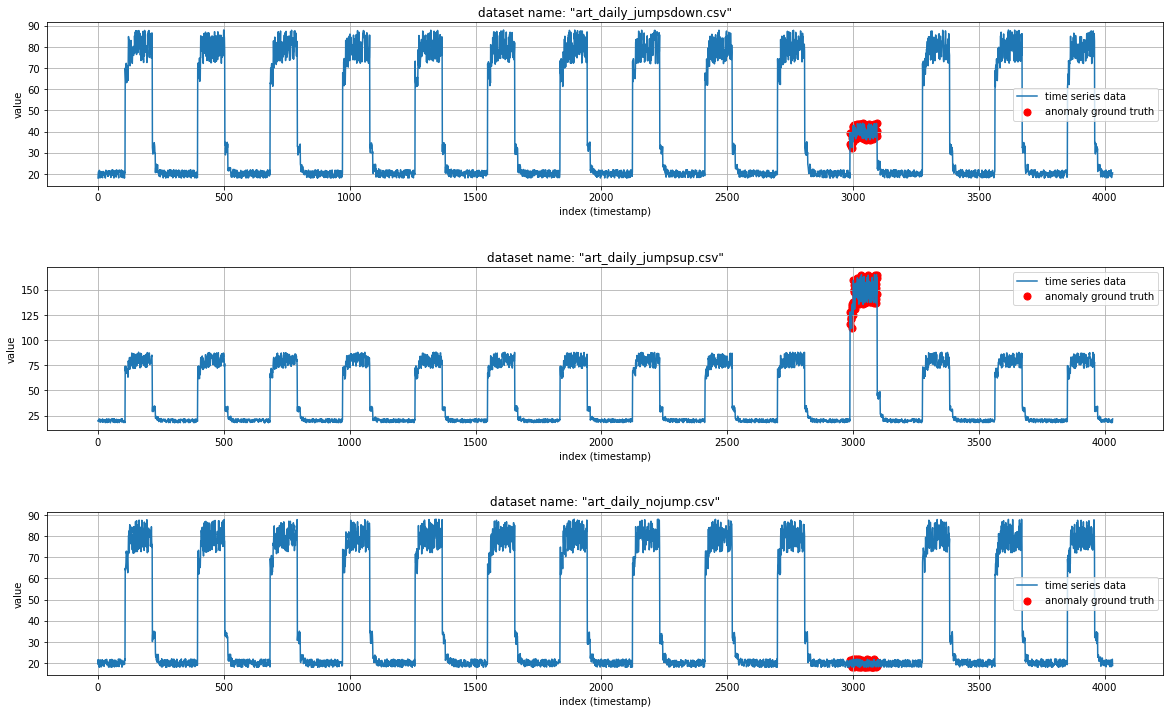

In [22]:
AWAFilePath = 'NAB\\data\\artificialWithAnomaly'

AWASelectedDatasets =['art_daily_jumpsdown.csv',
                     'art_daily_jumpsup.csv',
                     'art_daily_nojump.csv']
    
AWADatasetName = 'artificialWithAnomaly'  

plotTimeSeries(AWASelectedDatasets, AWAFilePath, AWADatasetName)

# Selected RealKnownCause (RKC) Time Series

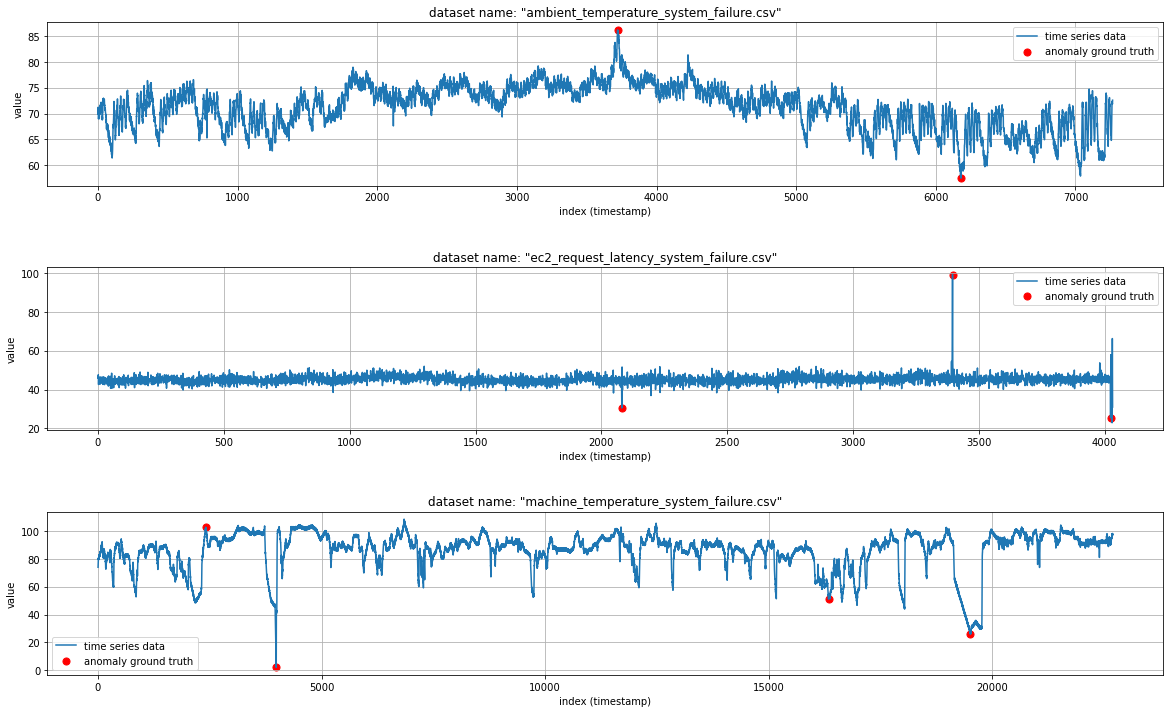

In [23]:
RKCFilePath = 'NAB\\data\\realKnownCause'

RKCSelectedDatasets =['ambient_temperature_system_failure.csv',
                     'ec2_request_latency_system_failure.csv',
                     'machine_temperature_system_failure.csv']
    
RKCDatasetName = 'realKnownCause'  

plotTimeSeries(RKCSelectedDatasets, RKCFilePath, RKCDatasetName)